# Project 2 : Visualization

## Instructions

### Description

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

### Getting Started

The lecture on data visualization (available in the usual places) has a lot of code examples.  Also don't forget the matplotlib documentation available from the Help menu in the notebook.

Also, this is the first assignment we've given where we ask you to provide text answers and not just code. You don't have to get fancy, but you'll want to use Markdown to write up your answers.  There is Markdown help available from the Help menu as well.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Credits

Many thanks to Saad Elbeleidy for this assignment!

### Setup Code

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [2]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

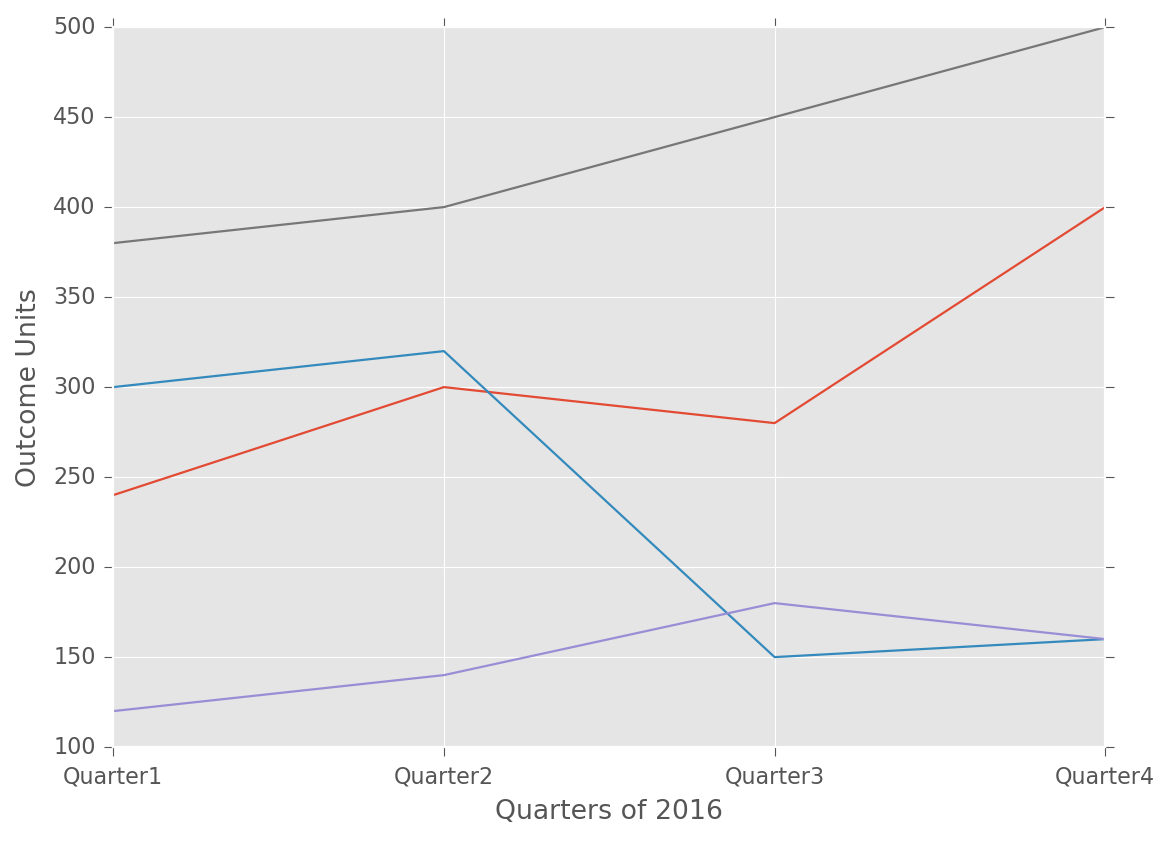

In [84]:
## Apply your chosen style here
from matplotlib import style
#print(plt.style.available)
#seaborn-darkgrid,

plt.plot(badLineProduct1)
plt.plot(badLineProduct2)
plt.plot(badLineProduct3)
plt.plot(badLineProduct4)
plt.style.use('ggplot')
plt.xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'])
plt.xlabel('Quarters of 2016')
plt.ylabel('Outcome Units')

#plt.xlabel('x_axis name')
#plt.ylabel('y_axis name')
plt.title('',fontsize=14)

plt.subplots_adjust(bottom=0.15)

#badLineProduct1 = [240, 300, 280, 400]
plt.show()

#add lables and split lines into pannels


example of how to set up subplots can be found in lecture 05, slide 13. 

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.
<br><br>
**Step 1: Buffers** 
<br>Each subplot will have its own y axis, but to make the scale is the same for all subplots, create a buffer between the lowest value among all products and the start of the y axis as well as between the highest value and the top of the y axis. These buffers are simply integers that extend the y axis above the highest value in the products, and below the lowest.
<br><br>
**Step 2: Mean**
<br>Calculate the mean of the entire data set -- the mean of the individual product means. To calculate this easily, first put the products in a list, create a list of the individual means using a comprehension over the product list, then find the mean of the list of individual means.
<br><br>
**Step 3: Colors**
<br>Choose a color for the plot of each product. This can be done by filling a list with each color's matplotlib name. Available colors can be found [here](https://matplotlib.org/2.0.2/api/colors_api.html)
<br><br>
**Step 4: Subplots** 
<br>Now that those numbers are calculated, create 4 line charts on top of each other, each plotting one of the products.
<br>For each subplot:
<br>
1) plot the product with `plot(data, color)`
<br>
2) Set the y scale using `set_ylim(bottomBuffer, topBuffer)`
<br>
3) Add an x label if this panel is not the bottom one using `set_xticklabels(list of labels)`
<br>
4) Add a title to the subplot with the product number using `set_title(title)`
<br>
5) Add a dashed line with the value of the mean using `plot(mean, args)` or `axhline(mean, args)`. More info [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html)
<br><br>
**Step 5: Beautify**
<br>
1) Add a title to the whole diagram(the superplot) with `fig.suptitle(title)`
<br>
2) Rearrange subplots, if necessary, with `fig.subplots_adjust(left, bottom, right, top, wspace, hspace)`
<br><br>
**Notes:**
<br>
- Many of the arguments to many of these functions are 'default', meaning they're optional. If there's an argument you don't need or want, try leaving it out. For example, if you only want to change the hspace of the subplots, you can call `fig.subplot_adjust(hspace=0.6)` without specifying the other arguments. Just be sure to label the argument you want to specify. Don't just write `fig.subplot_adjust(0.6)`

[[240, 300, 280, 400], [300, 320, 150, 160], [120, 140, 180, 160], [380, 400, 450, 500]]
the mean of badLineProduct1 is  305.0
the mean of badLineProduct1 is  232.5
the mean of badLineProduct1 is  150.0
the mean of badLineProduct1 is  432.5
the mean of all products is  714.53125


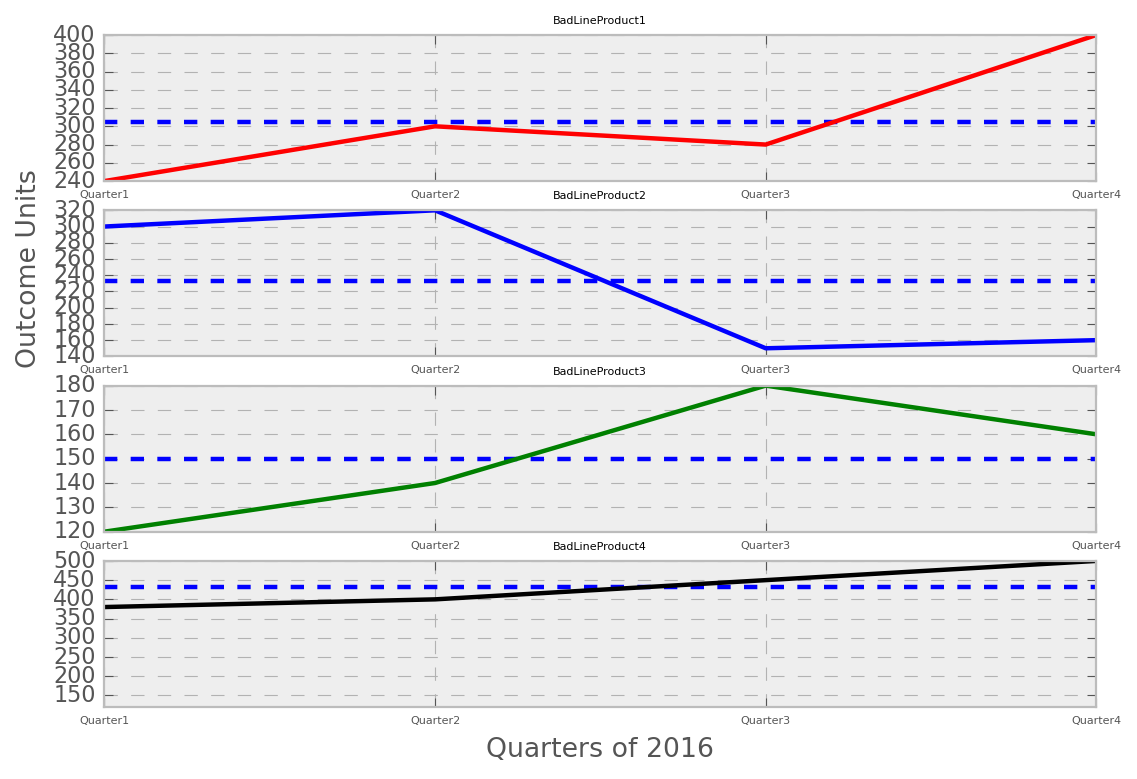

In [101]:
# Step 1
xs = [badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]
print(xs)

buffer=10
maxX = max(max(xs[0]),max(xs[1]),max(xs[2]),max(xs[3]))
#MaxY=max(max(xs[0]),max(xs[1]),max(xs[2]),max(xs[3]))
mean1=sum(badLineProduct1)/4
print('the mean of badLineProduct1 is ',mean1)

mean2=sum(badLineProduct2)/4
print('the mean of badLineProduct1 is ',mean2)

mean3=sum(badLineProduct3)/4
print('the mean of badLineProduct1 is ',mean3)

mean4=sum(badLineProduct4)/4
print('the mean of badLineProduct1 is ',mean4)

TotalMean=mean1+mean2+mean3+mean4/16
print('the mean of all products is ',TotalMean)


             # Plot the x and y values
#plt.set_ylim(0, maxX + buffer)          # Use the same scale
#plt.set_xlim(0, maxX + buffer)
#plt.plot(x,fx,"r-")                      # Plot the line
#set_title("Series {}".format(i+1), fontsize=8)   # Add the title for the dataset
#set_ylabel




fig,ax=plt.subplots(4)
#plt.xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'])
ax[0].set_title("BadLineProduct1",fontsize=5)
ax[0].axhline(y=np.nanmean(305.0),linestyle='--')
ax[0].plot(xs[0],'r')
ax[0].set_xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'],fontsize=5)
#ax[0].sex_yticks(fontsize=5)
#plt.xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'])

ax[1].set_title("BadLineProduct2",fontsize=5)
ax[1].axhline(y=np.nanmean(232.5),linestyle='--')
ax[1].plot(xs[1],'b')
ax[1].set_xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'],fontsize=5)


#plt.xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'])

ax[2].set_title("BadLineProduct3",fontsize=5)
ax[2].axhline(y=np.nanmean(150.0),linestyle='--')
ax[2].plot(xs[2],'g')
ax[2].set_xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'],fontsize=5)

ax[3].set_title("BadLineProduct4",fontsize=5)
ax[3].axhline(y=np.nanmean(432.5),linestyle='--')
ax[3].plot(xs[3],'k')
ax[3].set_xticks(np.arange(4),['Quarter1','Quarter2','Quarter3','Quarter4'],fontsize=5)


#calculate mean of each series

#sum of the total mean 

# Step 2
#create a buffer between the lowest value among all products and the start of the y axis as well as between 
#the highest value and the top of the y axis
plt.ylim(120,500) 
plt.xlim(0,3) 
#plt.xlim(0, maxX + buffer)
#plt.subplots()

plt.style.use('bmh')
# Step 3
plt.ylabel('Outcome Units',x=12,y=3.0)

plt.xlabel('Quarters of 2016')

# Step 4
#plt.title("Cities in colorado")    
# Step 5

#plt.title('The Affect of Bad Names on Bad Products',fontsize=14,x=0.5, y=3)
#plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(hspace=0.2)


Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**
1)The values in Badlinedata4 higher than all the rest of the badlinedata; the avg for badlinedata 4 is 432.5 so it makes sence. 

2)BadLinedata3 has the lowest average, BadLineData2 has the second lowest average and Badlinedata1 has the third lowest average.Each value is diffrent by about 80-70 ( so Badlinedata1(avg)-Badlinedata2(avg) and so forth). 


3)BadLinedata2,3 and 1 almost have a flat line from low to high but BadLinedata has a steady incline. During Quarter one, Products star at a high for BadlineData2, but are at a low for BadlineData2 but switch as they enter quarter 2. During quarter 3 to quarter 4, BadLinedata4 and Badlinedata 1 rise while BadlineData3 and 2 drop. 

Next, look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

### Problem 2: Bad pie chart (20 points)

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**

Pie charts should be used when comparing parts of a whole. The chart does not have a title.There is nothing that discribes what the patches are. The pie is somewhat an oval. 

In [5]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

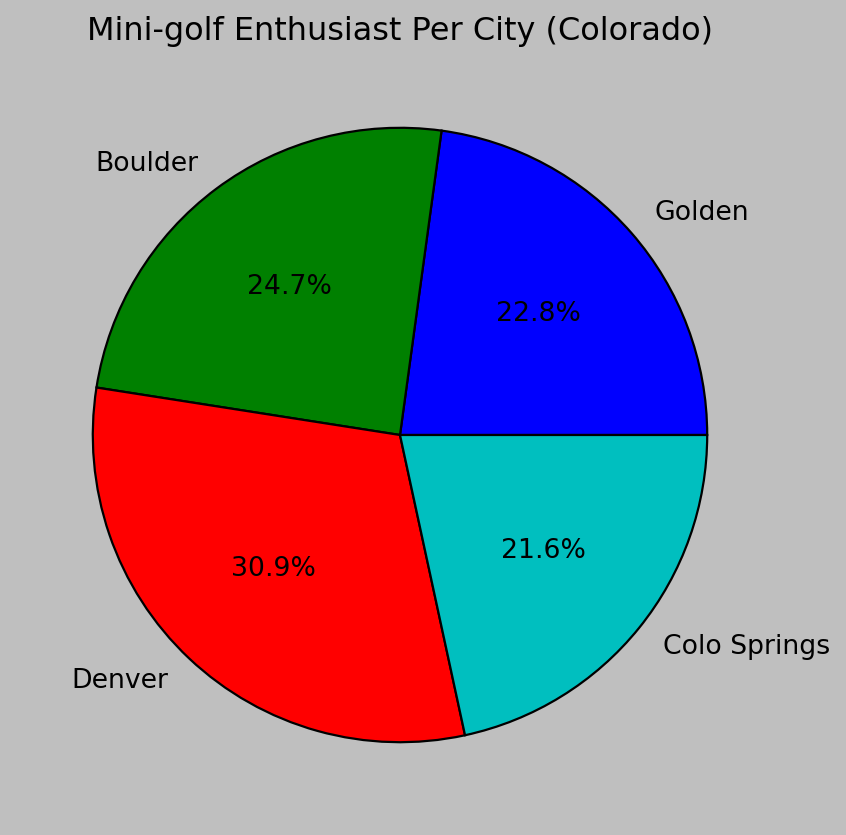

In [77]:
# Plot a better chart using this data

badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

#display values 
plt.style.use('classic')
#plt.set_ylim(0, 1000)
plt.subplots()
plt.pie(badPieValues,labels=badPieNames,autopct='%1.1f%%')
#plt.pue(value,)
plt.title("Mini-golf Enthusiast Per City (Colorado)")

plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

This pie chart displays the percentage mini-golf enthusiast per city in Colorado. It shows that Denver Colorado has the highest mini-golf enthusiast at 30.9% and the lowest in Colorado Springs at 21.6%. 

### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

**Your Answer Here:**

There is no titles. The feature scale is not set at 0. 

In [7]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 232, 251]

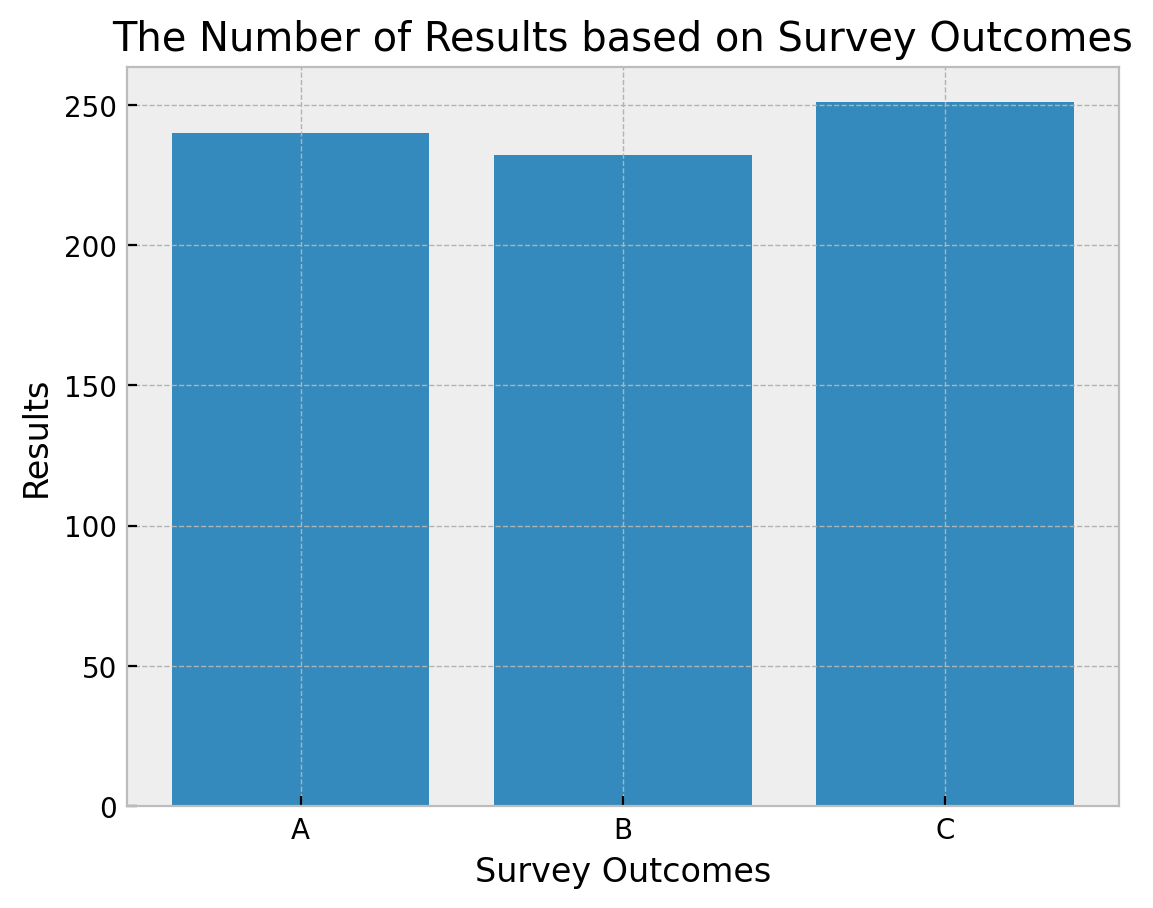

In [75]:
# Plot a better chart using this data

plt.subplots()
plt.bar(["A", "B", "C"], [240, 232, 251])
plt.style.use('ggplot')
plt.xlabel('Survey Outcomes')
plt.ylabel('Results')
plt.title("The Number of Results based on Survey Outcomes")
plt.show()


Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

This survery displays three diffrent outcomes of surveys after customers make an online purchase. A is opened and one question anwered, B is anwered and submitted and C is not completed. As one can see C has the highest number of outcomes at 250 not anwsered. All three are faily close in value.  



### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**

The bar chart starts at zero so that is ok, but the scale of July reaches to the top of the graph so that does not look very asthetic. There also needs to be x and y titles and a main title that discribes what is being measured.

In [9]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

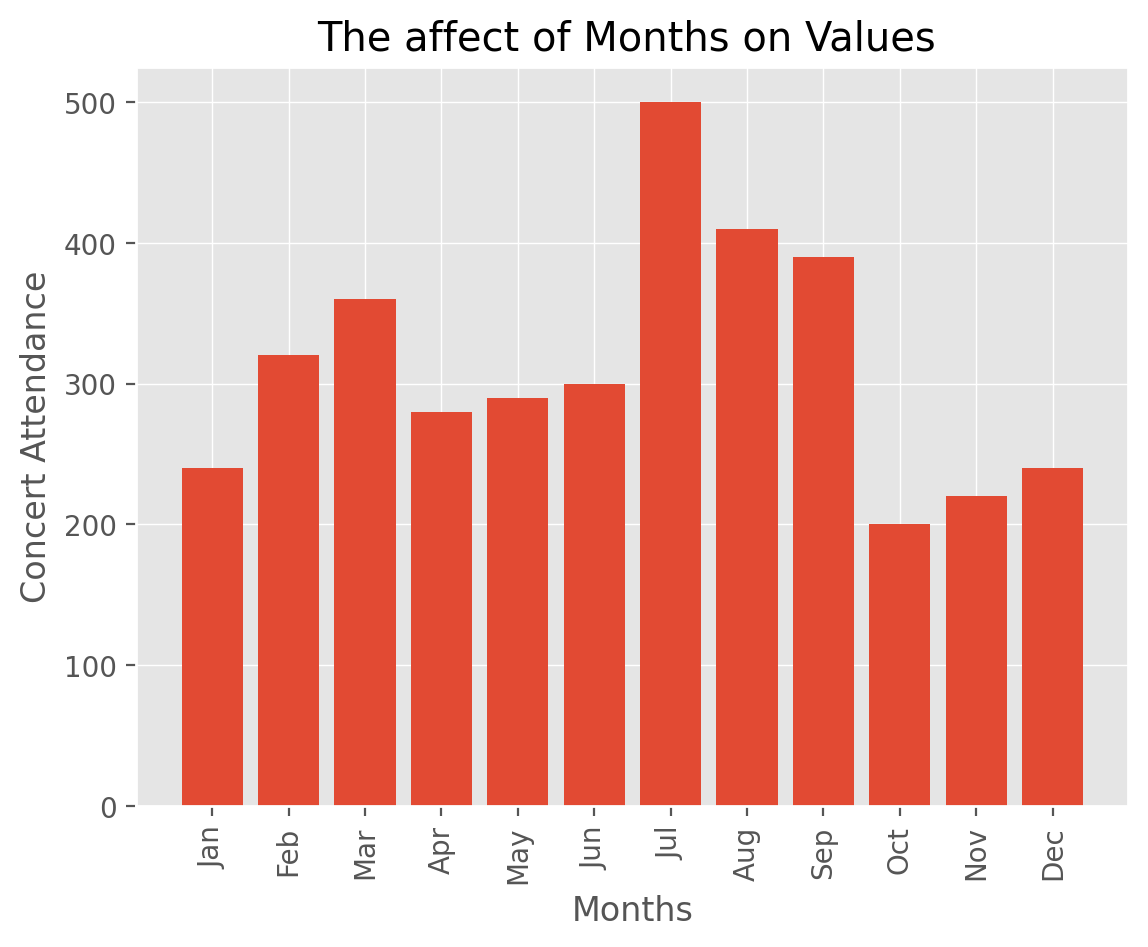

In [76]:
# Plot a better chart using this data

plt.subplots()
plt.bar(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],[240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240])
#rotate the names of months 
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.xlabel('Months')
plt.ylabel('Concert Attendance')
plt.title("The affect of Months on Values ")
plt.show()



Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

The summer months: Jun, July and August, have the highest concert attendance rather than fall months, October November and Decemeber. 

### Questionnaire
1) How long did you spend on this assignment?
<br><br>
2) What did you like about it? What did you not like about it?


I liked editing the diffrent graphs, but I think that there is something your exactly looking for based on beautifying methods.Trying to make the first graph fit just rigth was a little difficult, I feel like I spent the most time on that one rather than the rest of them.   

3) Did you find any errors or is there anything you would like changed?
The first question seems really hard and the rest are easy. I thought that the y values were too vauge. 